In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Lecture 9, example 1: oedometer test

# input data
# settlements in mm
delta = np.array([0, 0.25, 0.50, 1.0, 1.69, 2.1, 2.38, 2.61])
# stresses in kPa
sigma = np.array([0.0, 25, 50, 100, 200, 300, 400, 500])
length = 20 # length of the sample in mm

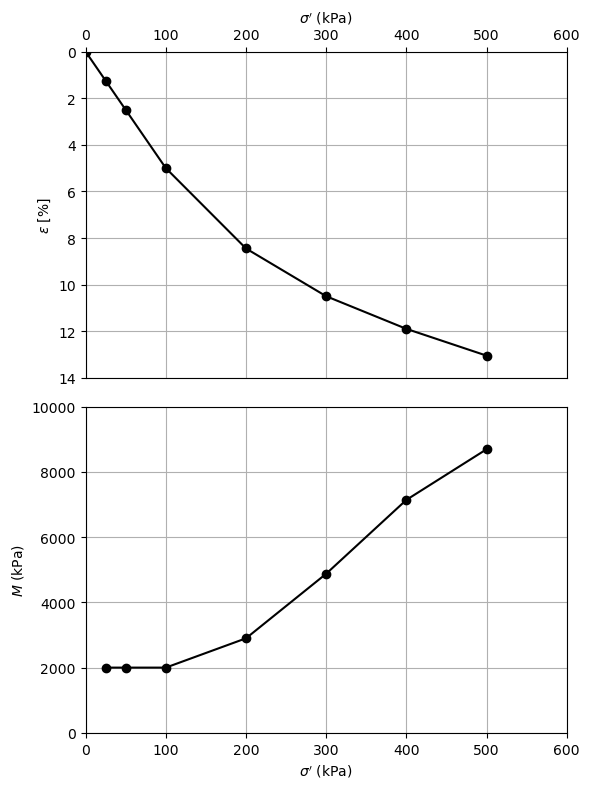

In [3]:
# compute strain
epsilon = delta / length
# compute d_epsilon
d_epsilon = np.diff(epsilon)
# compute d_sigma
d_sigma = np.diff(sigma)
# compute M
M = d_sigma / d_epsilon

# plot
fig, ax = plt.subplots(2, 1, figsize=(6, 8))
ax[0].plot(sigma, epsilon*100, 'ko-')
ax[0].set_xlabel(r"$\sigma'$ (kPa)")
ax[0].set_ylabel(r'$\varepsilon$ [%]')
# mark x-axis on top
ax[0].xaxis.tick_top()
ax[0].xaxis.set_label_position('top')
# x-axis limits
ax[0].set_xlim([0, 600])
# y-axis limits
ax[0].set_ylim([14, 0])
# grid
ax[0].grid(True)

ax[1].plot(sigma[1:], M, 'ko-')
ax[1].set_xlabel(r"$\sigma'$ (kPa)")
ax[1].set_ylabel(r'$M$ (kPa)')
# x-axis limits
ax[1].set_xlim([0, 600])
# y-axis limits
ax[1].set_ylim([0, 10000])
# grid
ax[1].grid(True)

plt.tight_layout()
plt.show()

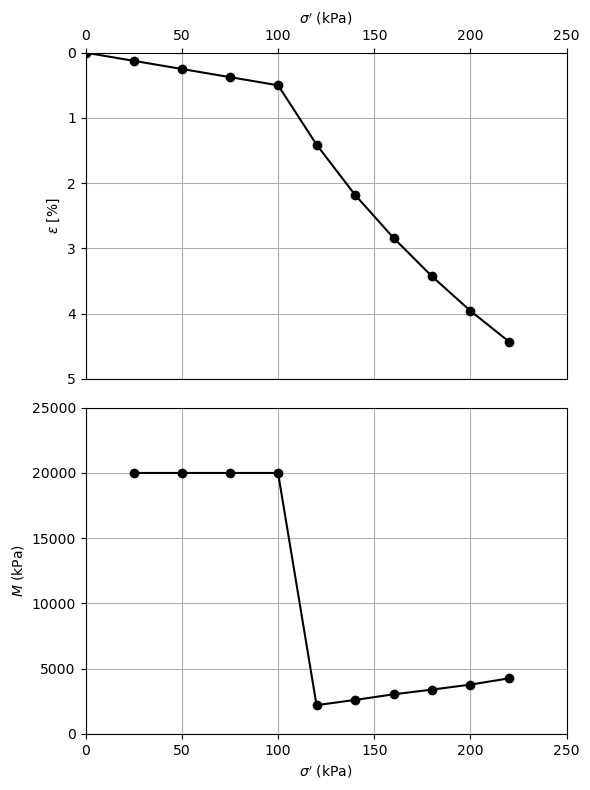

In [4]:
# exercise for lecture 9
# This is problem 3.1 of Aarhaug (1984)
# stress in kPa
sigma = np.array([0, 25, 50, 75, 100, 120, 140, 160, 180, 200, 220])
# strain in %
epsilon_prosent = np.array([0, 0.125, 0.250, 0.375, 0.5, 1.41, 2.18, 2.84, 3.43, 3.96, 4.43])
# strain
epsilon = epsilon_prosent / 100
# compute d_epsilon
d_epsilon = np.diff(epsilon)
# compute d_sigma
d_sigma = np.diff(sigma)
# compute M
M = d_sigma / d_epsilon

# plot
fig, ax = plt.subplots(2, 1, figsize=(6, 8))
ax[0].plot(sigma, epsilon_prosent, 'ko-')
ax[0].set_xlabel(r"$\sigma'$ (kPa)")
ax[0].set_ylabel(r'$\varepsilon$ [%]')
# mark x-axis on top
ax[0].xaxis.tick_top()
ax[0].xaxis.set_label_position('top')
# x-axis limits
ax[0].set_xlim([0, 250])
# y-axis limits
ax[0].set_ylim([5, 0])
# grid
ax[0].grid(True)

ax[1].plot(sigma[1:], M, 'ko-')
ax[1].set_xlabel(r"$\sigma'$ (kPa)")
ax[1].set_ylabel(r'$M$ (kPa)')
# x-axis limits
ax[1].set_xlim([0, 250])
# y-axis limits
ax[1].set_ylim([0, 25000])
# grid
ax[1].grid(True)

plt.tight_layout()
plt.show()

From the break in the curves, the preconsolidation stress $\sigma_c'$ is 100 kPa.

The clay is overconsolidated when $\sigma'_0$ is lower than $\sigma_c'$, and normally consolidated when $\sigma'_0$ is higher than $\sigma_c'$.

For the overconsolidated clay, it is easy to compute $m$. The deformation modulus $M=m\cdot\sigma_a=20\;000$ kPa (20 MPa). $\sigma_a=100$ kPa, therefore $m=200$

For the normally consolidated clay, m is the slope of the $M-\sigma'$ line:

In [5]:
# fit a line to the last 6 points of the M-sigma_prime curve
sigma_fit = sigma[5:]
M_fit = M[4:]
p = np.polyfit(sigma_fit, M_fit, 1)
print(f"m for NC clay = {p[0]:.2f}")

m for NC clay = 20.25
